[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RandyRDavila/Data_Science_and_Machine_Learning_Spring_2022/blob/main/Lecture_6/Lecture_6_2.ipynb)

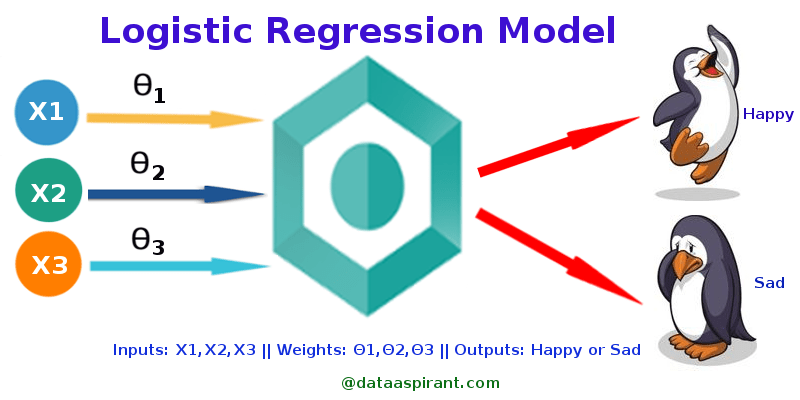

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, where you are trying to determine if a new sample fits best into a category. 

### Task
The objective is to classify according to the altitude above sea level, the balance and aftertaste of the cup of coffee if that specific coffee was grown in Colombia, Taiwan, or Guatemala. These three countries have been chosen because they have similar coffee quality levels but different environmental contexts. The data is hardly separable for the three countries, especially Colombia and Guatemala. Initially, these two countries will be analyzed; later, the original three countries with the three elements mentioned (altitude, balance, and aftertaste), and two more (Aroma and body) to see if the classification accuracy would increase. The Logistic regression algorithm by scikit-learn library is used. The classification indicators and the confusion matrix are used as quality indicators.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

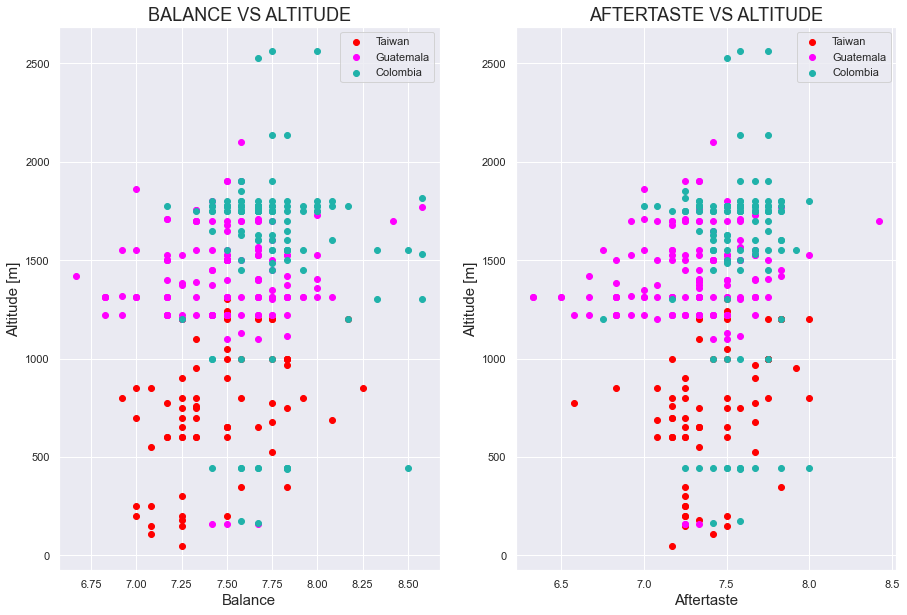

In [8]:
# Set theme for plotting
sns.set_theme()

# Import the data
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)

# Plot the data
countries = ["Taiwan", "Guatemala","Colombia"]
colors = ["red", "magenta", "lightseagreen"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax1.scatter(temp_df.Balance,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    ax2.scatter(temp_df.Aftertaste,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax1.set_xlabel("Balance", fontsize = 15)
ax1.set_ylabel("Altitude [m]", fontsize = 15)
ax1.set_title("BALANCE VS ALTITUDE", fontsize = 18)
ax1.legend()
ax2.set_xlabel("Aftertaste", fontsize = 15)
ax2.set_ylabel("Altitude [m]", fontsize = 15)
ax2.set_title("AFTERTASTE VS ALTITUDE", fontsize = 18)
ax2.legend()
plt.show()

Data is hardly separable for balance, afteraste and altitud, making the classificatio a dificul task. 

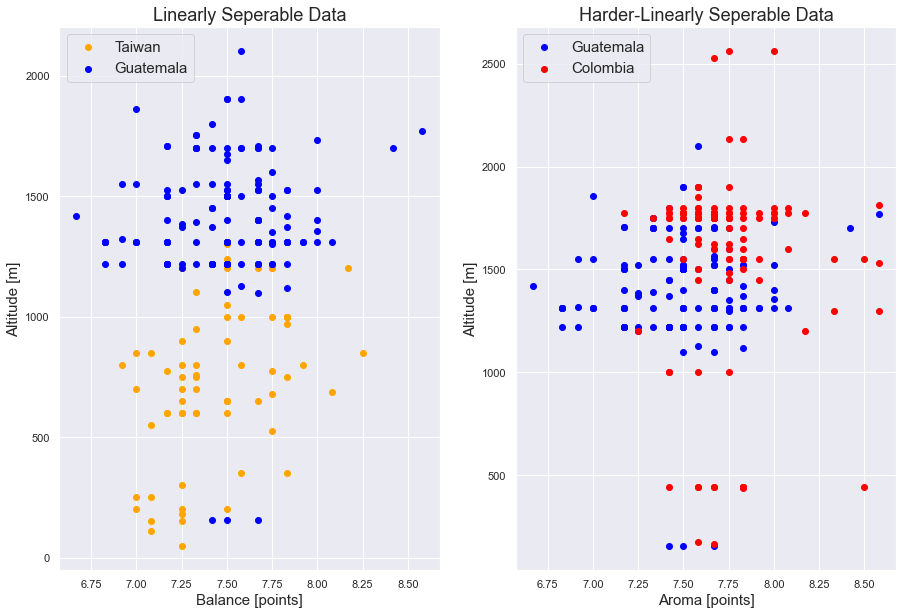

In [9]:
colombia = cafe[cafe.Country == "Colombia"]
taiwan = cafe[cafe.Country == "Taiwan"]
guatemala = cafe[cafe.Country == "Guatemala"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(taiwan.Balance, 
            taiwan.altitude_mean_meters, 
            color = "orange", 
            label = "Taiwan")
ax1.scatter(guatemala.Balance, 
            guatemala.altitude_mean_meters, 
            color = "blue", 
            label = "Guatemala")
ax1.set_xlabel("Balance [points]", fontsize = 15)
ax1.set_ylabel("Altitude [m]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)

ax2.scatter(guatemala.Balance, 
            guatemala.altitude_mean_meters, 
            color = "blue", 
            label = "Guatemala")
ax2.scatter(colombia.Balance, 
            colombia.altitude_mean_meters, 
            color = "red", 
            label = "Colombia")
ax2.set_xlabel("Aroma [points]", fontsize = 15)
ax2.set_ylabel("Altitude [m]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Harder-Linearly Seperable Data", fontsize = 18)
plt.show()

# Clasification using Logistic regression 

### Colombia-Guatemala

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression



In [58]:
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X1 = cafe_filter[[ 'Aftertaste', 'Balance','altitude_mean_meters']]
y1 = cafe_filter['Country']


In [60]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3,random_state=42)
logistic1 = LogisticRegression()
logistic1.fit(X1_train, y1_train)
print ("Train - Accuracy :", metrics.accuracy_score(y1_train,logistic1.predict(X1_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y1_test,logistic1.predict(X1_test)))


Train - Accuracy : 0.7696335078534031
Test - Accuracy : 0.7682926829268293


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 5 elements')

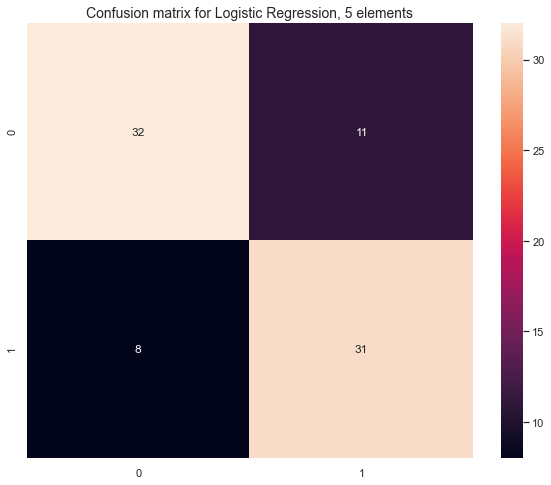

In [21]:
y1_pred = logistic1.predict(X1_test)
fig = plt.figure(figsize = (10,8))
cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 5 elements',fontsize=14)

In [22]:
cr1 = classification_report(y1_test, y1_pred, target_names=['Colombia','Guatemala'])
print(cr1)

              precision    recall  f1-score   support

    Colombia       0.80      0.74      0.77        43
   Guatemala       0.74      0.79      0.77        39

    accuracy                           0.77        82
   macro avg       0.77      0.77      0.77        82
weighted avg       0.77      0.77      0.77        82



#### Using five elements (Aditional Aroma and Body)


In [45]:
values=['Guatemala','Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X2 = cafe_filter[['Balance','altitude_mean_meters', 'Aftertaste', 'Aroma', 'Body']]
y2 = cafe_filter['Country']


In [55]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)
logistic2 = LogisticRegression()
logistic2.fit(X2_train, y2_train)
print ("Train - Accuracy :", metrics.accuracy_score(y2_train,logistic2.predict(X2_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y2_test,logistic2.predict(X2_test)))


Train - Accuracy : 0.7382198952879581
Test - Accuracy : 0.7073170731707317


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 2 elements')

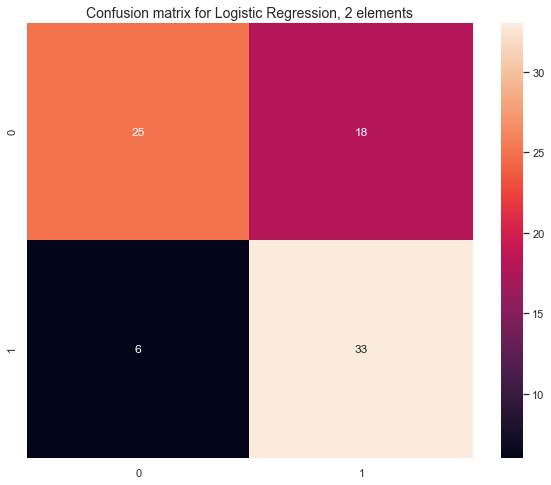

In [49]:
y2_pred = logistic2.predict(X2_test)
fig = plt.figure(figsize = (10,8))
cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 2 elements',fontsize=14)


In [50]:
cr2 = classification_report(y2_test, y2_pred, target_names=['Colombia','Guatemala'])
print(cr2)

              precision    recall  f1-score   support

    Colombia       0.81      0.58      0.68        43
   Guatemala       0.65      0.85      0.73        39

    accuracy                           0.71        82
   macro avg       0.73      0.71      0.70        82
weighted avg       0.73      0.71      0.70        82



#### Result

The logistic regression algorithm obtained a classification accuracy of 77%. By increasing the classification items from 3 to 5, the accuracy dropped to 73%. The fluctuations of the two additional elements for each country cause the algorithm to reduce its efficiency.

### Guatemala Taiwan and Colombia

In [38]:
values=['Guatemala','Taiwan', 'Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X3 = cafe_filter[['Aftertaste', 'Balance','altitude_mean_meters']]
y3 = cafe_filter['Country']


In [61]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3,random_state=42)
logistic3 = LogisticRegression()
logistic3.fit(X3_train, y3_train)
print ("Train - Accuracy :", metrics.accuracy_score(y3_train,logistic3.predict(X3_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y3_test,logistic3.predict(X3_test)))


Train - Accuracy : 0.8109243697478992
Test - Accuracy : 0.7184466019417476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 5 elements')

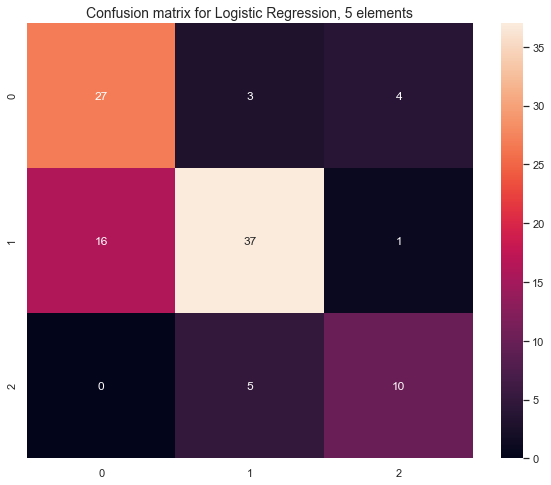

In [28]:
y3_pred = logistic3.predict(X3_test)
fig = plt.figure(figsize = (10,8))
cm3 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(cm3,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 5 elements',fontsize=14)

In [29]:
cr3 = classification_report(y3_test, y3_pred, target_names=['Guatemala','Taiwan', 'Colombia' ])
print(cr3)

              precision    recall  f1-score   support

   Guatemala       0.63      0.79      0.70        34
      Taiwan       0.82      0.69      0.75        54
    Colombia       0.67      0.67      0.67        15

    accuracy                           0.72       103
   macro avg       0.71      0.72      0.71       103
weighted avg       0.74      0.72      0.72       103



#### Using 5 elements (Aditional Aroma and Body)

In [31]:
values=['Guatemala','Taiwan', 'Colombia']
cafe_filter= cafe[cafe.Country.isin(values)]
X4 = cafe_filter[['Aftertaste', 'Balance','altitude_mean_meters', 'Aroma', 'Body']]
y4 = cafe_filter['Country']



In [62]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3,random_state=42)
logistic4 = LogisticRegression()
logistic4.fit(X4_train, y4_train)
print ("Train - Accuracy :", metrics.accuracy_score(y4_train,logistic4.predict(X4_train)))
print ("Train - Accuracy :", metrics.accuracy_score(y4_test,logistic4.predict(X4_test)))

Train - Accuracy : 0.7352941176470589
Train - Accuracy : 0.6699029126213593


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion matrix for Logistic Regression, 2 elements')

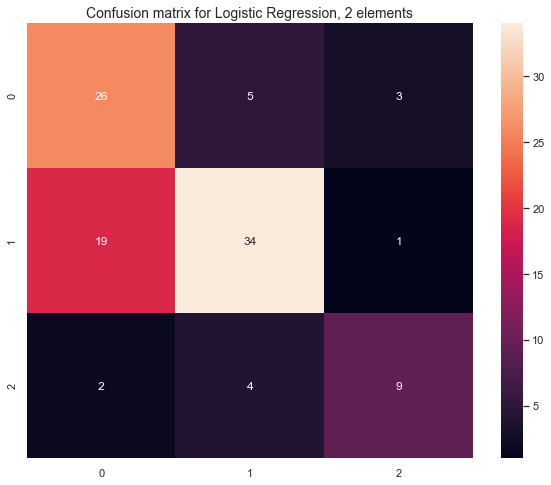

In [40]:
y4_pred = logistic4.predict(X4_test)
fig = plt.figure(figsize = (10,8))
cm4 = confusion_matrix(y4_test, y4_pred)
sns.heatmap(cm4,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression, 2 elements',fontsize=14)

### Result
the logistic regression algorithm obtained a classification accuracy of 72%. By increasing the classification items from 3 to 5, the accuracy dropped to 67%. In general, the best estimate of classification is in the order of 78% for this algorithm. When there are elements that are not easily separable, logistic regression presents difficulties in correctly classifying the country of origin of the cup of coffee that we seek to predict. This implies that so far, the KNN algorithm is the one that delivers the best results for the classification. 